In [48]:
# imports
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd

In [49]:
#seting up Data frame from csv, and display columns.
path="shark_tank_us_dataset.csv"
shark_tank_df=pd.read_csv(path)
shark_tank_df.columns

Index(['Season Number', 'Startup Name', 'Episode Number', 'Pitch Number',
       'Season Start', 'Season End', 'Original Air Date', 'Industry',
       'Business Description', 'Company Website', 'Pitchers Gender',
       'Pitchers Average Age', 'Pitchers City', 'Pitchers State',
       'Entrepreneur Names', 'Multiple Entrepreneurs', 'US Viewership',
       'Original Ask Amount', 'Original Offered Equity', 'Valuation Requested',
       'Got Deal', 'Total Deal Amount', 'Total Deal Equity', 'Deal Valuation',
       'Number of Sharks in Deal', 'Investment Amount Per Shark',
       'Equity Per Shark', 'Royalty Deal', 'Advisory Shares Equity', 'Loan',
       'Deal Has Conditions', 'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymon

In [50]:
#selecting relevant columns for answering our questions and displaying df and columns
shark_tank_clean_df=shark_tank_df[['Startup Name', 'Pitch Number', 'Industry', 'Pitchers Gender', 'Pitchers State', 'Multiple Entrepreneurs', 'Original Ask Amount', 'Valuation Requested', 'Got Deal', 'Total Deal Amount', 'Deal Valuation', 'Number of Sharks in Deal','Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymond John Investment Amount',
       'Daymond John Investment Equity', 'Kevin O Leary Investment Amount',
       'Kevin O Leary Investment Equity']]
print(shark_tank_clean_df.columns)
shark_tank_clean_df.tail()

Index(['Startup Name', 'Pitch Number', 'Industry', 'Pitchers Gender',
       'Pitchers State', 'Multiple Entrepreneurs', 'Original Ask Amount',
       'Valuation Requested', 'Got Deal', 'Total Deal Amount',
       'Deal Valuation', 'Number of Sharks in Deal',
       'Barbara Corcoran Investment Amount',
       'Barbara Corcoran Investment Equity', 'Mark Cuban Investment Amount',
       'Mark Cuban Investment Equity', 'Lori Greiner Investment Amount',
       'Lori Greiner Investment Equity', 'Robert Herjavec Investment Amount',
       'Robert Herjavec Investment Equity', 'Daymond John Investment Amount',
       'Daymond John Investment Equity', 'Kevin O Leary Investment Amount',
       'Kevin O Leary Investment Equity'],
      dtype='object')


,Startup Name,Pitch Number,Industry,Pitchers Gender,Pitchers State,Multiple Entrepreneurs,Original Ask Amount,Valuation Requested,Got Deal,Total Deal Amount,...,Mark Cuban Investment Amount,Mark Cuban Investment Equity,Lori Greiner Investment Amount,Lori Greiner Investment Equity,Robert Herjavec Investment Amount,Robert Herjavec Investment Equity,Daymond John Investment Amount,Daymond John Investment Equity,Kevin O Leary Investment Amount,Kevin O Leary Investment Equity
1356,RoboBurger,1357,Food and Beverage,Male,NaN,1.0,1500000,30000000,1,1500000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,750000.0,4.5
1357,SipHerbals,1358,Food and Beverage,Female,OR,0.0,100000,1000000,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1358,mosh,1359,Food and Beverage,Mixed Team,NaN,1.0,500000,25000000,1,500000.0,...,NaN,NaN,500000.0,3.5,NaN,NaN,NaN,NaN,NaN,NaN
1359,ARBER,1360,Lifestyle/Home,Female,NaN,0.0,500000,12500000,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1360,flaus,1361,Lifestyle/Home,Female,NaN,0.0,250000,5000000,1,250000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


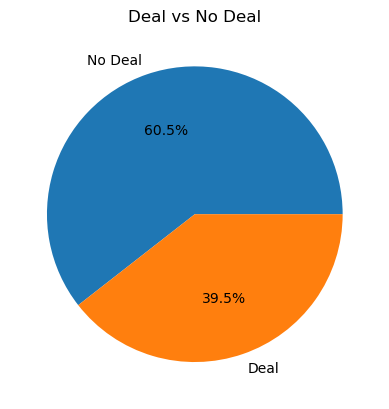

In [51]:
#How many People got deals?
deals =shark_tank_clean_df['Got Deal'].value_counts()
labels={ 'Deal', 'No Deal'}
plt.pie(deals, labels=labels,  autopct="%1.1f%%")
plt.title("Deal vs No Deal")
plt.savefig("output_data/Fig1.png")
plt.show()

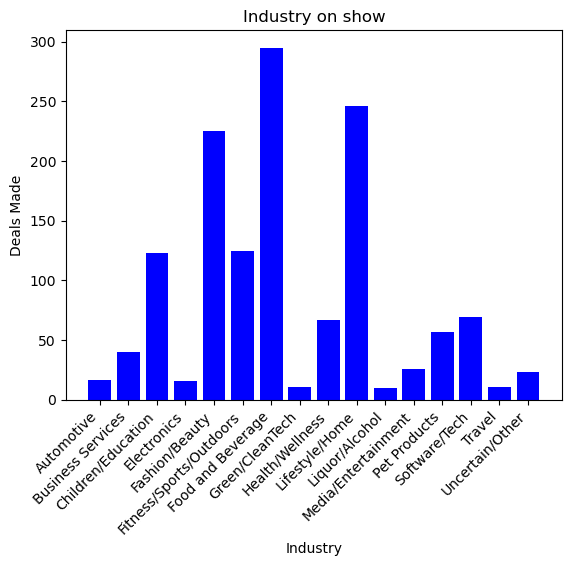

In [52]:
#which industries are shown the most
all_industry_df = shark_tank_clean_df.groupby('Industry').size()
x_axis = all_industry_df.index
y_axis = all_industry_df.values
plt.bar(x_axis, y_axis, color="b", align="center")
plt.xlabel('Industry')
plt.ylabel('Deals Made')
plt.title('Industry on show')
plt.xticks(rotation=45, ha='right')
plt.savefig("output_data/Fig2.png")
plt.show()
# top industries: Food and Beverage, Lifestyle/Home, Fashion/Beauty

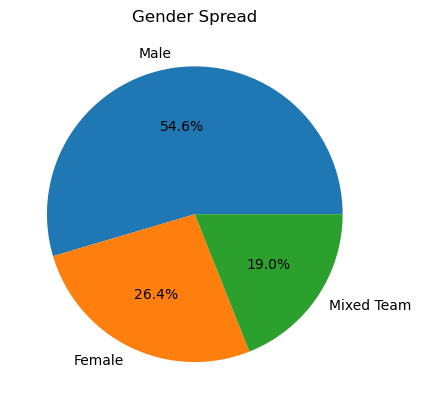

In [7]:
# what gender is represented the most
all_gender =shark_tank_clean_df['Pitchers Gender'].value_counts()
plt.pie(all_gender, labels=all_gender.index,  autopct="%1.1f%%")
plt.title("Gender Spread")
plt.savefig("output_data/Fig3.png")
plt.show()

Pitchers Gender
Male      739
Female    358
Name: count, dtype: int64


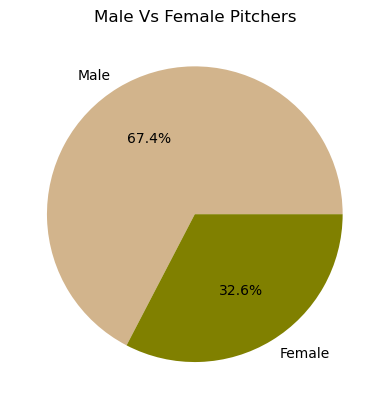

In [44]:
no_mixed = shark_tank_clean_df[shark_tank_clean_df['Pitchers Gender'] != 'Mixed Team']
male_female=no_mixed['Pitchers Gender'].value_counts()
print(male_female)
colors={'tan','olive'}
all_gender =no_mixed['Pitchers Gender'].value_counts()
plt.pie(all_gender, labels=all_gender.index, colors=colors , autopct="%1.1f%%")
plt.title("Male Vs Female Pitchers")
plt.savefig("output_data/Fig11.png")
plt.show()

In [19]:
# We only wnat the data of people who got deals!!
tank_winners_df = shark_tank_clean_df.loc[shark_tank_clean_df['Got Deal'] == 1]
number_of_deals=tank_winners_df['Got Deal'].count()
pitches=1361
print(f"There have been {number_of_deals} deals on Shark Tank over 15 seasons.")
percent_sucess=round((number_of_deals/pitches)*100,2)
print(f"{percent_sucess}% of pitches ended in deals")

There have been 824 deals on Shark Tank over 15 seasons.
60.54% of pitches ended in deals


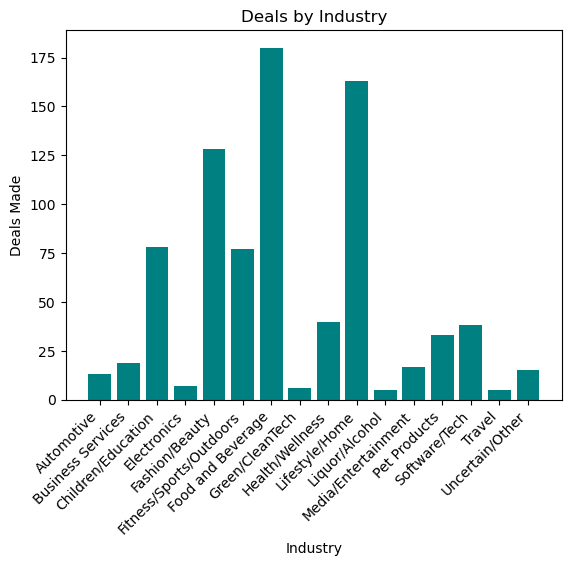

In [9]:
#Generated a bar graph to find the best Industy to be in
industry_df = tank_winners_df.groupby('Industry').size()
x_axis = industry_df.index
y_axis = industry_df.values
plt.bar(x_axis, y_axis, color="teal", align="center")
plt.xlabel('Industry')
plt.ylabel('Deals Made')
plt.title('Deals by Industry')
plt.xticks(rotation=45, ha='right')
plt.savefig("output_data/Fig4.png")
plt.show()
# top industries: Food and Beverage, Lifestyle/Home, Fashion/Beauty

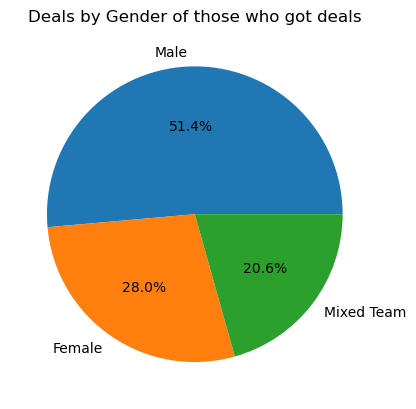

In [89]:
#Lets find out if there is a Gender bias 
gender =tank_winners_df['Pitchers Gender'].value_counts()
plt.pie(gender, labels=gender.index,  autopct="%1.1f%%")
plt.title("Deals by Gender of those who got deals")
plt.savefig("output_data/Fig5.png")
plt.show()


Pitchers Gender
Male      421
Female    229
Name: count, dtype: int64


C:\Users\beauh\AppData\Local\Temp\ipykernel_5288\713302196.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  no_mixed = tank_winners_df[shark_tank_clean_df['Pitchers Gender'] != 'Mixed Team']


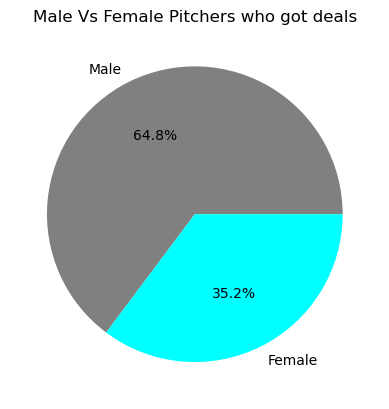

In [47]:
no_mixed = tank_winners_df[shark_tank_clean_df['Pitchers Gender'] != 'Mixed Team']
male_female=no_mixed['Pitchers Gender'].value_counts()
print(male_female)
colors={'cyan','grey'}
all_gender =no_mixed['Pitchers Gender'].value_counts()
plt.pie(all_gender, labels=all_gender.index, colors=colors , autopct="%1.1f%%")
plt.title("Male Vs Female Pitchers who got deals")
plt.savefig("output_data/Fig12.png")
plt.show()

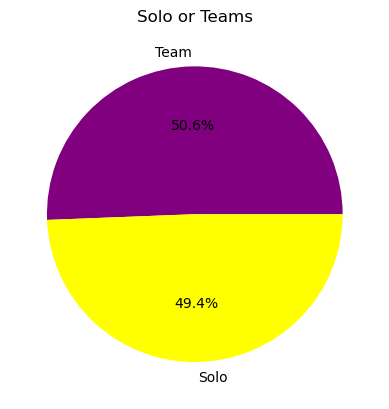

In [92]:
teams =tank_winners_df['Multiple Entrepreneurs'].value_counts()
labels={'Team','Solo'}
colors={'purple','yellow'}
plt.pie(teams, labels=labels, colors=colors, autopct="%1.1f%%")
plt.title("Solo or Teams")
plt.savefig("output_data/Fig6.png")
plt.show()

In [12]:
tank_winners_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824 entries, 0 to 1360
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Startup Name                        824 non-null    object 
 1   Pitch Number                        824 non-null    int64  
 2   Industry                            824 non-null    object 
 3   Pitchers Gender                     819 non-null    object 
 4   Pitchers State                      447 non-null    object 
 5   Multiple Entrepreneurs              567 non-null    float64
 6   Original Ask Amount                 824 non-null    int64  
 7   Valuation Requested                 824 non-null    int64  
 8   Got Deal                            824 non-null    int64  
 9   Total Deal Amount                   824 non-null    float64
 10  Deal Valuation                      824 non-null    float64
 11  Number of Sharks in Deal            824 non-null 

In [59]:

# barbara=tank_winners_df['Barbara Corcoran Investment Amount'].value_counts().sum()
# mark=tank_winners_df['Mark Cuban Investment Amount'].value_counts().sum()
# lori=tank_winners_df['Lori Greiner Investment Amount'].value_counts().sum()
# robert=tank_winners_df['Robert Herjavec Investment Amount'].value_counts().sum()
# daymond=tank_winners_df['Daymond John Investment Amount'].value_counts().sum()
# kevin=tank_winners_df['Kevin O Leary Investment Amount'].value_counts().sum()
columns_list=[x for x in tank_winners_df.columns if "Investment Amount" in x]
investments={k:[tank_winners_df[k].value_counts().sum()] for k in columns_list }
investments_df=pd.DataFrame(investments)
investments_df

,Barbara Corcoran Investment Amount,Mark Cuban Investment Amount,Lori Greiner Investment Amount,Robert Herjavec Investment Amount,Daymond John Investment Amount,Kevin O Leary Investment Amount
0,130,249,217,127,117,127


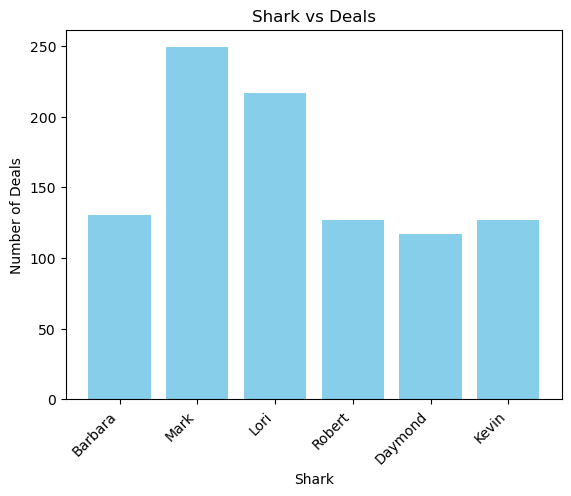

In [93]:
y_values = investments_df.iloc[0]
investors = [col.split(' ')[0] for col in investments_df.columns]
plt.bar(investors, y_values, color='skyblue')
plt.title('Shark vs Deals')
plt.xlabel('Shark')
plt.ylabel('Number of Deals')
plt.xticks(rotation=45, ha='right')
plt.savefig("output_data/Fig7.png")
plt.show()

In [72]:
cuban_df = tank_winners_df[
    (tank_winners_df['Mark Cuban Investment Amount'].notna()) & 
    (tank_winners_df['Number of Sharks in Deal'] > 1)
]
cuban_df
cuban_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 6 to 1348
Data columns (total 24 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Startup Name                        121 non-null    object 
 1   Pitch Number                        121 non-null    int64  
 2   Industry                            121 non-null    object 
 3   Pitchers Gender                     121 non-null    object 
 4   Pitchers State                      66 non-null     object 
 5   Multiple Entrepreneurs              84 non-null     float64
 6   Original Ask Amount                 121 non-null    int64  
 7   Valuation Requested                 121 non-null    int64  
 8   Got Deal                            121 non-null    int64  
 9   Total Deal Amount                   121 non-null    float64
 10  Deal Valuation                      121 non-null    float64
 11  Number of Sharks in Deal            121 non-null 

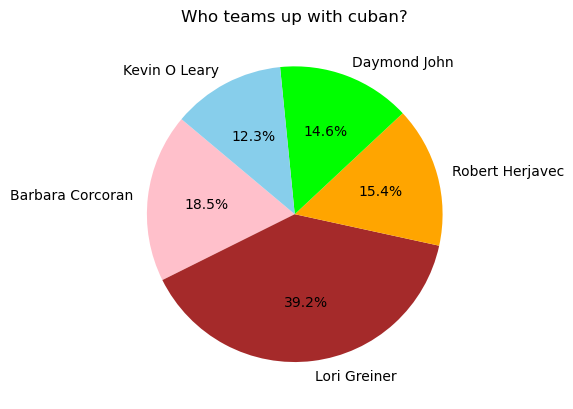

In [94]:
shark=['Barbara Corcoran', 'Lori Greiner', 'Robert Herjavec', 'Daymond John','Kevin O Leary']
cuban_deals =[24,51,20,19,16]
teams =cuban_deals
labels=shark
colors={'pink','lime','orange','skyblue','brown'}
plt.pie(cuban_deals, labels=shark, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Who teams up with cuban?")
plt.savefig("output_data/Fig8.png")
plt.show()

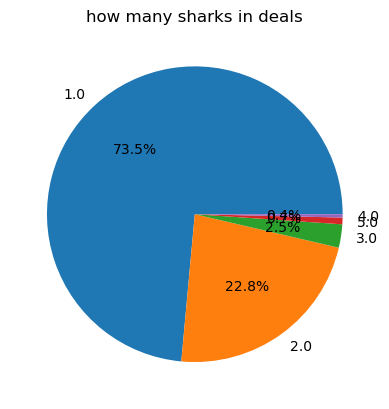

In [78]:
shark_or_sharks =tank_winners_df['Number of Sharks in Deal'].value_counts()
plt.pie(shark_or_sharks, labels=shark_or_sharks.index,  autopct="%1.1f%%")
plt.title("how many sharks in deals")
plt.show()

In [79]:
top_sharks_df = tank_winners_df[
    (tank_winners_df['Mark Cuban Investment Amount'].notna()) & 
    (tank_winners_df['Lori Greiner Investment Amount'].notna())
]

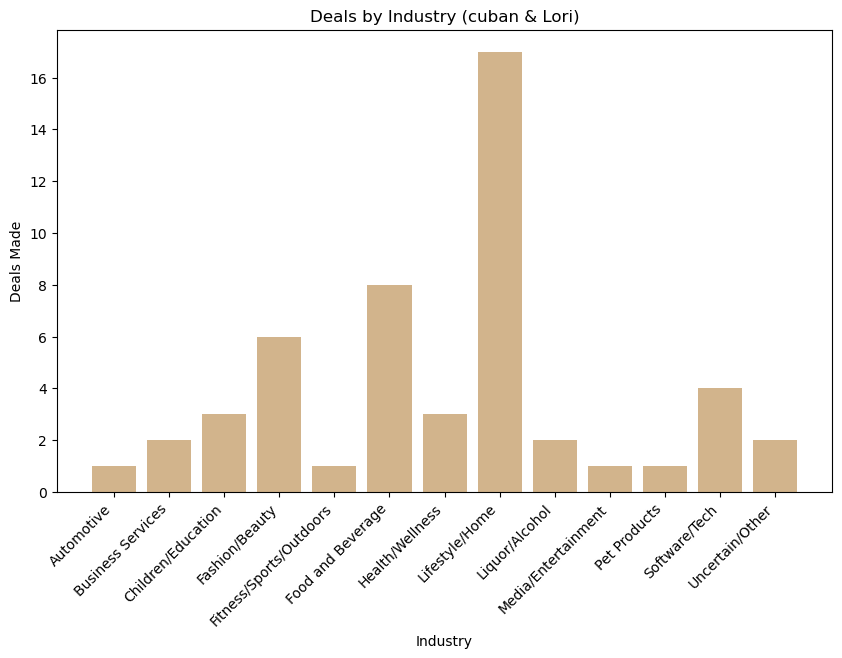

In [95]:
top_industry_df = top_sharks_df.groupby('Industry').size()
x_axis = top_industry_df.index
y_axis = top_industry_df.values
plt.figure(figsize=(10, 6))
plt.bar(x_axis, y_axis, color="tan", align="center")
plt.xlabel('Industry')
plt.ylabel('Deals Made')
plt.title('Deals by Industry (cuban & Lori)')
plt.xticks(rotation=45, ha='right')
plt.savefig("output_data/Fig9.png")
plt.show()

In [23]:
ask=round(tank_winners_df['Valuation Requested'].mean(),2)
deal=round(tank_winners_df['Deal Valuation'].mean(),2)
print(f"The average ask is {ask}, and the avverage deal is worth {deal}")

The average ask is 3456996.2, and the avverage deal is worth 2181114.14


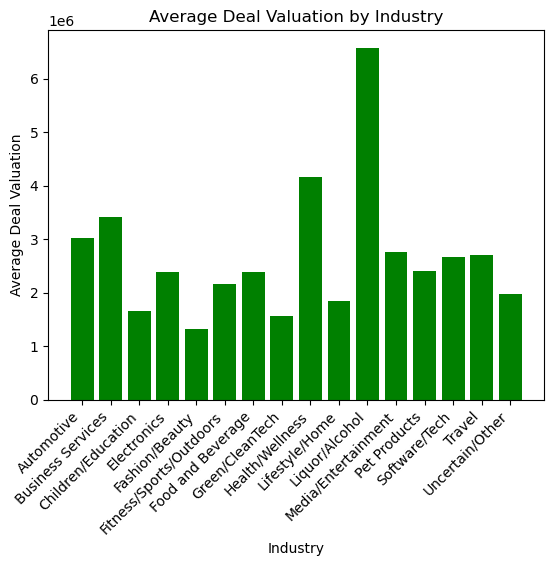

In [31]:
industry_valuation_sum = tank_winners_df.groupby('Industry')['Deal Valuation'].mean()
run = industry_valuation_sum.index
rise = industry_valuation_sum.values
plt.bar(run, rise, color="green", align="center")
plt.xlabel('Industry')
plt.ylabel('Average Deal Valuation')
plt.title('Average Deal Valuation by Industry')
plt.xticks(rotation=45, ha='right')
plt.savefig("output_data/Fig10.png")
plt.show()